# Proyecto Modelación y Simulación

Integrantes:
- Oscar López
- Yong Park
- Rodrigo Barrera

In [472]:
import pandas as pd
import numpy as np

In [473]:
covid_data = pd.read_csv('./data/covid-data.csv')

In [474]:
covid_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [475]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [476]:
covid_data.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [477]:
covid_data["INTUBED"].unique()

array([97,  1,  2, 99], dtype=int64)

In [478]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, Image as IPImage

In [479]:
class Person:
    def __init__(self, age, sex, pregnant, diabetes, asthma, immunosuppressed,
                 hypertension, other_disease, cardiovascular, obesity,
                 renal_chronic, tobacco,pheumonia, intubed,position):
        self.age = age
        self.sex = sex
        self.pregnant = pregnant
        self.diabetes = diabetes
        self.asthma = asthma
        self.immunosuppressed = immunosuppressed
        self.hypertension = hypertension
        self.other_disease = other_disease
        self.cardiovascular = cardiovascular
        self.obesity = obesity
        self.renal_chronic = renal_chronic
        self.tobacco = tobacco
        self.pheumonia = pheumonia
        self.intubed = intubed
        self.position = position
        self.recovered = False
        self.dead = False
        self.infected = False


In [480]:
sex_value_counts = covid_data['SEX'].value_counts(normalize=True)
print(sex_value_counts)


1    0.500741
2    0.499259
Name: SEX, dtype: float64


In [481]:
disease_factor_counts = covid_data['OTHER_DISEASE'].value_counts(normalize=True)
print(disease_factor_counts)

2     0.968448
1     0.026741
98    0.004811
Name: OTHER_DISEASE, dtype: float64


In [482]:
pheumonia_factor_counts = covid_data['PNEUMONIA'].value_counts(normalize=True)
print(pheumonia_factor_counts)

2     0.851188
1     0.133551
99    0.015262
Name: PNEUMONIA, dtype: float64


In [483]:
died_factor_counts = covid_data['DATE_DIED'].value_counts(normalize=True)
print(died_factor_counts["9999-99-99"])
print(1-died_factor_counts["9999-99-99"])

0.9266223207686622
0.07337767923133776


In [484]:
inmmunosuppresed_factor_counts = covid_data['INMSUPR'].value_counts(normalize=True)
print(inmmunosuppresed_factor_counts)

2     0.983240
1     0.013514
98    0.003246
Name: INMSUPR, dtype: float64


In [485]:
tabaco_factor_counts = covid_data['TOBACCO'].value_counts(normalize=True)
print(tabaco_factor_counts)

2     0.916462
1     0.080467
98    0.003071
Name: TOBACCO, dtype: float64


In [486]:
cardiovascular_factor_counts = covid_data['CARDIOVASCULAR'].value_counts(normalize=True)
print(cardiovascular_factor_counts)


2     0.977260
1     0.019807
98    0.002934
Name: CARDIOVASCULAR, dtype: float64


In [487]:
asthma_factor_counts = covid_data['ASTHMA'].value_counts(normalize=True)
print(asthma_factor_counts)

2     0.967050
1     0.030109
98    0.002841
Name: ASTHMA, dtype: float64


In [488]:
hypertension_factor_counts = covid_data['HIPERTENSION'].value_counts(normalize=True)
print(hypertension_factor_counts)


2     0.841849
1     0.155191
98    0.002960
Name: HIPERTENSION, dtype: float64


In [489]:
age_factor_counts = covid_data['AGE'].value_counts(normalize=True).sort_index()
print(sum(age_factor_counts[50:]))

0.3067553584626753


In [490]:
intubed_factor_counts = covid_data['INTUBED'].value_counts(normalize=True).sort_index()
print(intubed_factor_counts)

1     0.032097
2     0.151682
97    0.809235
99    0.006986
Name: INTUBED, dtype: float64


In [491]:
def distance(p1, p2):
    return np.linalg.norm(p1.position - p2.position)


In [492]:
def calculate_infection_probability(person, other):
    # Puedes ajustar esta función según tus necesidades y datos específicos
    # Aquí estoy asumiendo una probabilidad básica y ajustándola según diferentes factores.
    base_prob = 0.3
    # Aumentar la probabilidad para mayores de 50
    if person.age > 50:
        age_factor = sum(age_factor_counts[50:])
    elif person.age < 5:
        age_factor = sum(age_factor_counts[:5])
    else:
        age_factor = sum(age_factor_counts[5:50])
    sex_factor = sex_value_counts[2] if person.sex == 2 else sex_value_counts[1]  # Mayor probabilidad en hombres
    disease_factor = disease_factor_counts[1] if person.other_disease == 1 else disease_factor_counts[2]  # Mayor probabilidad si tiene otras enfermedades
    pheumonia_factor = pheumonia_factor_counts[1] if person.pheumonia == 1 else pheumonia_factor_counts[2]
    inmmunosuppresed_factor = inmmunosuppresed_factor_counts[1] if person.immunosuppressed == 1 else inmmunosuppresed_factor_counts[2]
    tabaco_factor = tabaco_factor_counts[1] if person.tobacco == 1 else tabaco_factor_counts[2]
    cardiovascular_factor = cardiovascular_factor_counts[1] if person.cardiovascular == 1 else cardiovascular_factor_counts[2]
    asthma_factor = asthma_factor_counts[1] if person.asthma == 1 else asthma_factor_counts[2]
    hypertension_factor = hypertension_factor_counts[1] if person.hypertension == 1 else hypertension_factor_counts[2]
    
    return (base_prob + age_factor + sex_factor + disease_factor + pheumonia_factor + inmmunosuppresed_factor + tabaco_factor + cardiovascular_factor + asthma_factor + hypertension_factor) / 10


In [493]:
def calculate_recovery_probability(person):
    # Probabilidad base
    base_prob = died_factor_counts["9999-99-99"]

    # Factores ajustados
    if person.age > 50:
        age_factor = sum(age_factor_counts[50:])
    elif person.age < 5:
        age_factor = sum(age_factor_counts[:5])
    else:
        age_factor = sum(age_factor_counts[5:50])
    pneumonia_factor = pheumonia_factor_counts[2] if person.pheumonia == 2 else pheumonia_factor_counts[1]
    other_disease_factor = disease_factor_counts[2] if person.other_disease == 2 else disease_factor_counts[1]
    intubed_factor = intubed_factor_counts[1] if person.intubed == 1 else intubed_factor_counts[2]

    return (base_prob + age_factor + pneumonia_factor + other_disease_factor + intubed_factor) / 5

def calculate_death_probability(person):
    # Probabilidad base
    base_prob = 1 - died_factor_counts["9999-99-99"]

    # Factores ajustados
    if person.age > 50:
        age_factor = sum(age_factor_counts[50:])
    elif person.age < 5:
        age_factor = sum(age_factor_counts[:5])
    else:
        age_factor = sum(age_factor_counts[5:50])
    pneumonia_factor = pheumonia_factor_counts[1] if person.pheumonia == 1 else pheumonia_factor_counts[2]
    intubed_factor = intubed_factor_counts[2] if person.intubed == 2 else intubed_factor_counts[1]
    
    return (base_prob + age_factor + pneumonia_factor + intubed_factor) / 4


In [494]:
# Crear una población
num_people = 1000
people = [Person(
    np.random.randint(0, 90),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.random.choice([1, 2]),
    np.array([np.random.rand()*350, np.random.rand()*350])
) for _ in range(num_people)]

In [495]:
# Simular la infección de una persona aleatoria
patient_zero = np.random.choice(people)
patient_zero.infected = True

In [496]:
# Simulación
num_days = 30
infection_radius = 15
list_images = []
results = []

In [497]:
for day in range(num_days):
    for person in people:
        if person.infected:
            for other in people:
                if not other.infected and distance(person, other) < infection_radius:
                    infection_prob = calculate_infection_probability(person, other)
                    # print("infection_prob: ",infection_prob)
                    if np.random.rand() < infection_prob:
                        other.infected = True
                        person.recovered = False
                        person.recovered = False
        
        if person.infected and not person.dead and not person.recovered:
            # Probabilidad de muerte
            death_prob = calculate_death_probability(person)
            # print("death_prob: ",death_prob)
            if np.random.rand() < death_prob:
                person.dead = True
        
        if person.infected and not person.dead:
            # Probabilidad de recuperación
            recovery_prob = calculate_recovery_probability(person)
            # print("recovery_prob: ",recovery_prob)
            if np.random.rand() < recovery_prob:
                person.infected = False
                person.recovered = True
        

    # Actualización del gráfico
    x_infected = [person.position[0] for person in people if person.infected]
    y_infected = [person.position[1] for person in people if person.infected]
    x_not_infected = [person.position[0] for person in people if not person.infected]
    y_not_infected = [person.position[1] for person in people if not person.infected]
    x_recovered = [person.position[0] for person in people if person.recovered]
    y_recovered = [person.position[1] for person in people if person.recovered]
    x_dead = [person.position[0] for person in people if person.dead]
    y_dead = [person.position[1] for person in people if person.dead]
    
    num_not_infected = sum(1 for person in people if not person.infected)
    num_infected = sum(1 for person in people if person.infected and not person.recovered and not person.dead)
    num_recovered = sum(1 for person in people if person.recovered)
    num_dead = sum(1 for person in people if person.dead)
    
    results.append([num_not_infected,num_infected,num_recovered,num_dead])
    
    # Graficar
    plt.plot(x_infected, y_infected, "ro", label="Infected")
    plt.plot(x_not_infected, y_not_infected, "bo")
    plt.plot(x_recovered, y_recovered, "go", label="Recovered")
    plt.plot(x_dead, y_dead, "ko", label="Dead")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Day " + str(day))
    plt.legend()
    name = "./results/day_" + str(day) + ".jpg"
    plt.savefig(name, format="jpg")
    plt.close()
    list_images.append(name)



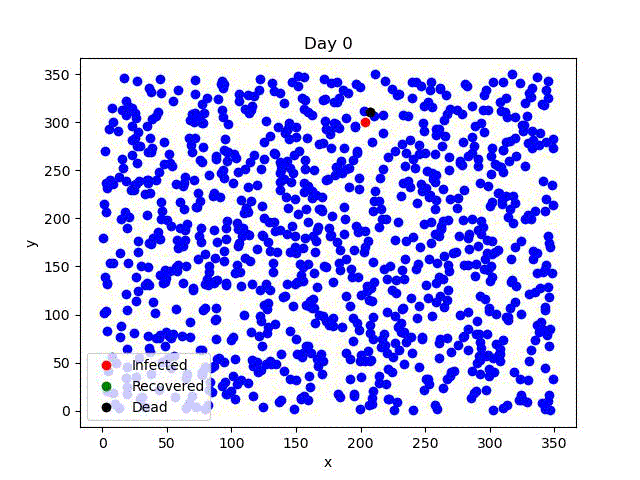

In [498]:
# Guardar imágenes como un GIF
gif_path = "./results/animation_complex.gif"
images = [Image.open(path) for path in list_images]
images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=400)
display(IPImage(filename=gif_path))

In [390]:
d = 1
for i in results:
    # Imprimir resultados
    print(f"Day {d}:")
    print(f"  Not Infected: {i[0]}")
    print(f"  Infected: {i[1]}")
    print(f"  Recovered: {i[2]}")
    print(f"  Dead: {i[3]}")
    d+=1

Day 1:
  Not Infected: 998
  Infected: 2
  Recovered: 1
  Dead: 0
Day 2:
  Not Infected: 991
  Infected: 5
  Recovered: 4
  Dead: 2
Day 3:
  Not Infected: 973
  Infected: 13
  Recovered: 10
  Dead: 5
Day 4:
  Not Infected: 965
  Infected: 11
  Recovered: 15
  Dead: 12
Day 5:
  Not Infected: 944
  Infected: 18
  Recovered: 28
  Dead: 17
Day 6:
  Not Infected: 920
  Infected: 28
  Recovered: 41
  Dead: 23
Day 7:
  Not Infected: 899
  Infected: 26
  Recovered: 56
  Dead: 34
Day 8:
  Not Infected: 884
  Infected: 18
  Recovered: 70
  Dead: 45
Day 9:
  Not Infected: 858
  Infected: 26
  Recovered: 80
  Dead: 50
Day 10:
  Not Infected: 842
  Infected: 31
  Recovered: 89
  Dead: 56
Day 11:
  Not Infected: 828
  Infected: 31
  Recovered: 98
  Dead: 64
Day 12:
  Not Infected: 801
  Infected: 28
  Recovered: 115
  Dead: 75
Day 13:
  Not Infected: 749
  Infected: 53
  Recovered: 134
  Dead: 95
Day 14:
  Not Infected: 710
  Infected: 50
  Recovered: 156
  Dead: 117
Day 15:
  Not Infected: 682
  In